In [1]:
#all the librarys used in this project
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib

In [2]:
data = pd.read_excel('MUSB Hackathon.xlsx')

In [3]:
data.head()

,Customer ID,Date of Default,Amount Default,Cumulative Payment till date,Total Loan,Gender,State,Bank,Default,Purchase Channel,Age,Insurance,Loan,Savings,FD,DMAT,Fraud,Card Type,City
0,546301568,2019-08-24 00:00:00,582993,420324.0,1003317.0,1,0,ICICI,1,3,59.0,1,663918,216348,0,1,N,0,Delhi
1,18658241,2020-12-04 00:00:00,760344,708671.0,1469015.0,1,0,SBI,1,1,59.0,1,107236,439609,1,0,N,0,Kolkata
2,545307255,2018-10-30 00:00:00,433971,835055.0,1269026.0,0,2,SBI,0,1,35.0,0,745659,415287,1,0,N,1,Delhi
3,685777392,2019-04-14 00:00:00,945476,759583.0,1705059.0,0,1,SBI,1,2,38.0,0,24216,284974,0,0,N,0,Mumbai
4,838154128,2020-11-30 00:00:00,874825,71394.0,946219.0,1,2,SBI,1,3,50.0,0,794057,18748,1,1,N,1,Mumbai


In [4]:
data.columns # column names

Index(['Customer ID', 'Date of Default', 'Amount Default',
       'Cumulative Payment till date', 'Total Loan', 'Gender', 'State', 'Bank',
       'Default', 'Purchase Channel', 'Age', 'Insurance', 'Loan', 'Savings',
       'FD', 'DMAT', 'Fraud', 'Card Type', 'City'],
      dtype='object')

In [5]:
data.isnull().sum()

Customer ID                     0
Date of Default                 0
Amount Default                  0
Cumulative Payment till date    1
Total Loan                      1
Gender                          0
State                           0
Bank                            0
Default                         0
Purchase Channel                0
Age                             1
Insurance                       0
Loan                            0
Savings                         0
FD                              0
DMAT                            0
Fraud                           0
Card Type                       0
City                            0
dtype: int64

### **Data Cleaning**

In [6]:
data.dropna(how='any', inplace= True) #since only two of the columns contain null value of 1 each droping 2 rows 
#would not have much impact given the amount of data

In [7]:
#renaming the columns
data = data.rename(columns={'Cumulative Payment till date': "Repayed"})

Dropping the loan since it is not actually adding up, and customer ID and date of defualt since we do not know the time the loan was taken hence perio cant be counted

In [8]:
data.drop(['Loan', 'State', 'Customer ID', 'Date of Default'], axis=1, inplace = True)

In [9]:
data.columns

Index(['Amount Default', 'Repayed', 'Total Loan', 'Gender', 'Bank', 'Default',
       'Purchase Channel', 'Age', 'Insurance', 'Savings', 'FD', 'DMAT',
       'Fraud', 'Card Type', 'City'],
      dtype='object')

Checking the distribution of dependent variable default against various independent variables

In [10]:
data.groupby('Default')['Gender'].count()

Default
0    5020
1    4978
Name: Gender, dtype: int64

In [11]:
data.groupby('City')['Default'].sum()

City
Chennai    1290
Delhi      1258
Kolkata    1197
Mumbai     1233
Name: Default, dtype: int64

In [12]:
data.groupby('Default')['Insurance'].sum()

Default
0    2533
1    2445
Name: Insurance, dtype: int64

In [13]:
data.groupby('Bank')['Default'].sum()

Bank
HDFC     1680
ICICI    1634
SBI      1664
Name: Default, dtype: int64

X and y for y = default

In [14]:
data.head()

,Amount Default,Repayed,Total Loan,Gender,Bank,Default,Purchase Channel,Age,Insurance,Savings,FD,DMAT,Fraud,Card Type,City
0,582993,420324.0,1003317.0,1,ICICI,1,3,59.0,1,216348,0,1,N,0,Delhi
1,760344,708671.0,1469015.0,1,SBI,1,1,59.0,1,439609,1,0,N,0,Kolkata
2,433971,835055.0,1269026.0,0,SBI,0,1,35.0,0,415287,1,0,N,1,Delhi
3,945476,759583.0,1705059.0,0,SBI,1,2,38.0,0,284974,0,0,N,0,Mumbai
4,874825,71394.0,946219.0,1,SBI,1,3,50.0,0,18748,1,1,N,1,Mumbai


In [15]:
X = data[['Amount Default', 'Repayed', 'Total Loan', 'Gender', 'Bank',
       'Purchase Channel', 'Age', 'Insurance', 'Savings', 'FD', 'DMAT',
       'Fraud', 'Card Type', 'City']].values

In [16]:
X.shape

(9998, 14)

In [17]:
y = data[['Default']].values

In [18]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder = LabelEncoder()
X[:,4] = labelencoder.fit_transform(X[:,4])
X[:,5] = labelencoder.fit_transform(X[:,5])
X[:,11] = labelencoder.fit_transform(X[:,11])
X[:,13] = labelencoder.fit_transform(X[:,13])

In [19]:
from sklearn.compose import ColumnTransformer
ct = ColumnTransformer([("Bank", OneHotEncoder(), [4])], remainder= 'passthrough')
X = ct.fit_transform(X)
X

array([[0.0, 1.0, 0.0, ..., 0, 0, 1],
       [0.0, 0.0, 1.0, ..., 0, 0, 2],
       [0.0, 0.0, 1.0, ..., 0, 1, 1],
       ...,
       [0.0, 0.0, 1.0, ..., 0, 1, 3],
       [0.0, 0.0, 1.0, ..., 0, 1, 3],
       [1.0, 0.0, 0.0, ..., 0, 1, 2]], dtype=object)

In [20]:

ct = ColumnTransformer([("City", OneHotEncoder(), [15])], remainder= 'passthrough')
X = ct.fit_transform(X)

In [21]:
ct = ColumnTransformer([("Purchase Channel", OneHotEncoder(), [11])], remainder= 'passthrough')
X = ct.fit_transform(X)

In [22]:
X = pd.DataFrame(X, columns =["P1","P2","P3","C1","C2", "C3","C4", "B1", "B2", "B3", 'Amount Default', 'Repayed', 'Total Loan', 'Gender',
        'Age', 'Insurance', 'Savings', 'FD', 'DMAT',
       'Fraud', 'Card Type'])

In [23]:
X.head()

,P1,P2,P3,C1,C2,C3,C4,B1,B2,B3,...,Repayed,Total Loan,Gender,Age,Insurance,Savings,FD,DMAT,Fraud,Card Type
0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,420324.0,1003317.0,1,59.0,1,216348,0,1,0,0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,708671.0,1469015.0,1,59.0,1,439609,1,0,0,0
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,835055.0,1269026.0,0,35.0,0,415287,1,0,0,1
3,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,759583.0,1705059.0,0,38.0,0,284974,0,0,0,0
4,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,71394.0,946219.0,1,50.0,0,18748,1,1,0,1


In [24]:
X.drop(columns=["B1", "C1", "P1", 'Fraud', 'FD', 'Insurance', 'DMAT'], axis = 1, inplace = True)

In [25]:
X.shape

(9998, 14)

### Train-Test Split for y = default

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.2, random_state = 0)

In [27]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train  = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [28]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from keras.models import Sequential
from keras.layers import Dense


def build_classifier():
    classifier = Sequential()
    classifier.add(Dense(units = 14, kernel_initializer = 'uniform', activation ='relu', input_dim = 14))
    #classifier.add(Dense(units = 7, kernel_initializer = 'uniform', activation ='relu'))
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation ='sigmoid'))
    classifier.compile(optimizer = 'adam', loss= 'binary_crossentropy', metrics = ['accuracy'])
    
    return classifier 

classifier = KerasClassifier(build_fn = build_classifier, batch_size = 10, epochs =100)
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10, n_jobs = 1)
mean = accuracies.mean()
variance = accuracies.std()

<ipython-input-28-4b3b50ed05d2>:16: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  classifier = KerasClassifier(build_fn = build_classifier, batch_size = 10, epochs =100)


Epoch 1/100
720/720 [==============================] - 7s 6ms/step - loss: 0.6933 - accuracy: 0.4908
Epoch 2/100
720/720 [==============================] - 4s 5ms/step - loss: 0.6931 - accuracy: 0.4972
Epoch 3/100
720/720 [==============================] - 3s 4ms/step - loss: 0.6927 - accuracy: 0.5106
Epoch 4/100
720/720 [==============================] - 3s 3ms/step - loss: 0.6921 - accuracy: 0.5135
Epoch 5/100
720/720 [==============================] - 4s 6ms/step - loss: 0.6915 - accuracy: 0.5213
Epoch 6/100
720/720 [==============================] - 3s 4ms/step - loss: 0.6908 - accuracy: 0.5292
Epoch 7/100
720/720 [==============================] - 3s 3ms/step - loss: 0.6904 - accuracy: 0.5300
Epoch 8/100
720/720 [==============================] - 1s 2ms/step - loss: 0.6894 - accuracy: 0.5399
Epoch 9/100
720/720 [==============================] - 1s 2ms/step - loss: 0.6889 - accuracy: 0.5389
Epoch 10/100
720/720 [==============================] - 1s 2ms/step - loss: 0.6886 - accura

### Mean = 0.5058797031641007
### Variance = 0.020238332290851875 

In [29]:
X.head()

,P2,P3,C2,C3,C4,B2,B3,Amount Default,Repayed,Total Loan,Gender,Age,Savings,Card Type
0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,582993,420324.0,1003317.0,1,59.0,216348,0
1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,760344,708671.0,1469015.0,1,59.0,439609,0
2,0.0,0.0,1.0,0.0,0.0,0.0,1.0,433971,835055.0,1269026.0,0,35.0,415287,1
3,1.0,0.0,0.0,0.0,1.0,0.0,1.0,945476,759583.0,1705059.0,0,38.0,284974,0
4,0.0,1.0,0.0,0.0,1.0,0.0,1.0,874825,71394.0,946219.0,1,50.0,18748,1


Metrics considered for calculating cumilative score

**New variable Score based on % weightage to balance in savings accounts, amount default, total repayed and Toatal loan**

In [30]:
X['Score'] = 0.3 *X['Savings'] + 0.40*(X['Amount Default']/X['Total Loan']) + 0.3*(X['Repayed']/X['Savings'])

### Train Test Split for y = Default with new independant variable score

In [31]:
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size =0.2, random_state = 0)

In [32]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train1  = sc.fit_transform(X_train1)
X_test1 = sc.transform(X_test1)

In [33]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from keras.models import Sequential
from keras.layers import Dense


def build_classifier():
    classifier = Sequential()
    classifier.add(Dense(units = 15, kernel_initializer = 'uniform', activation ='relu', input_dim = 15))
    #classifier.add(Dense(units = 9, kernel_initializer = 'uniform', activation ='relu'))
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation ='sigmoid'))
    classifier.compile(optimizer = 'adam', loss= 'binary_crossentropy', metrics = ['accuracy'])
    
    return classifier 

classifier1 = KerasClassifier(build_fn = build_classifier, batch_size = 10, epochs =100)
accuracies1 = cross_val_score(estimator = classifier1, X = X_train1, y = y_train1, cv = 10, n_jobs = 1)
mean1 = accuracies1.mean()
variance1 = accuracies1.std()

Epoch 1/100


<ipython-input-33-362351c90579>:16: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  classifier1 = KerasClassifier(build_fn = build_classifier, batch_size = 10, epochs =100)


720/720 [==============================] - 2s 2ms/step - loss: 0.6934 - accuracy: 0.4975
Epoch 2/100
720/720 [==============================] - 2s 2ms/step - loss: 0.6931 - accuracy: 0.5029
Epoch 3/100
720/720 [==============================] - 2s 2ms/step - loss: 0.6927 - accuracy: 0.5100
Epoch 4/100
720/720 [==============================] - 2s 2ms/step - loss: 0.6921 - accuracy: 0.5174
Epoch 5/100
720/720 [==============================] - 2s 2ms/step - loss: 0.6915 - accuracy: 0.5144
Epoch 6/100
720/720 [==============================] - 2s 3ms/step - loss: 0.6909 - accuracy: 0.5192
Epoch 7/100
720/720 [==============================] - 1s 2ms/step - loss: 0.6903 - accuracy: 0.5203
Epoch 8/100
720/720 [==============================] - 1s 2ms/step - loss: 0.6900 - accuracy: 0.5293
Epoch 9/100
720/720 [==============================] - 1s 2ms/step - loss: 0.6894 - accuracy: 0.5346
Epoch 10/100
720/720 [==============================] - 1s 2ms/step - loss: 0.6893 - accuracy: 0.5358
E

### Mean = 0.5123785972595215
### Variance = 0.01766357831125997


In [35]:
print(mean)
print(variance)

0.5058797031641007
0.020238332290851875


In [36]:
print(mean1)
print(variance1)

0.5123785972595215
0.01766357831125997


### Creating confusion matrix

Epoch 1/100
800/800 [==============================] - 3s 3ms/step - loss: 0.6933 - accuracy: 0.4947
Epoch 2/100
800/800 [==============================] - 2s 3ms/step - loss: 0.6932 - accuracy: 0.5014
Epoch 3/100
800/800 [==============================] - 2s 2ms/step - loss: 0.6927 - accuracy: 0.5126
Epoch 4/100
800/800 [==============================] - 2s 2ms/step - loss: 0.6922 - accuracy: 0.5120
Epoch 5/100
800/800 [==============================] - 3s 3ms/step - loss: 0.6916 - accuracy: 0.5191
Epoch 6/100
800/800 [==============================] - 2s 2ms/step - loss: 0.6911 - accuracy: 0.5258
Epoch 7/100
800/800 [==============================] - 2s 2ms/step - loss: 0.6905 - accuracy: 0.5333
Epoch 8/100
800/800 [==============================] - 2s 2ms/step - loss: 0.6898 - accuracy: 0.5359
Epoch 9/100
800/800 [==============================] - 2s 2ms/step - loss: 0.6894 - accuracy: 0.5376
Epoch 10/100
800/800 [==============================] - 2s 2ms/step - loss: 0.6889 - accura

<Axes: >

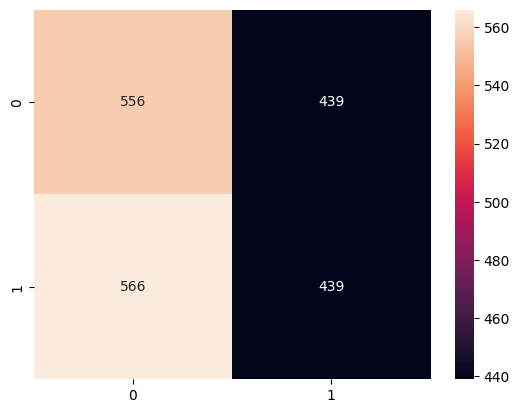

In [42]:
import seaborn as sns
from sklearn import metrics
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.65)
print("accuracy:", metrics.accuracy_score(y_test, y_pred))
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt ='')

### New Model with dependent variable as Purcahse Channels to find effect of various other variables on it

In [44]:
data.head()

,Amount Default,Repayed,Total Loan,Gender,Bank,Default,Purchase Channel,Age,Insurance,Savings,FD,DMAT,Fraud,Card Type,City
0,582993,420324.0,1003317.0,1,ICICI,1,3,59.0,1,216348,0,1,N,0,Delhi
1,760344,708671.0,1469015.0,1,SBI,1,1,59.0,1,439609,1,0,N,0,Kolkata
2,433971,835055.0,1269026.0,0,SBI,0,1,35.0,0,415287,1,0,N,1,Delhi
3,945476,759583.0,1705059.0,0,SBI,1,2,38.0,0,284974,0,0,N,0,Mumbai
4,874825,71394.0,946219.0,1,SBI,1,3,50.0,0,18748,1,1,N,1,Mumbai


In [46]:
data['Purchase Channel'] = data['Purchase Channel'] -1

In [47]:
data.groupby('Purchase Channel')['Gender'].count()

Purchase Channel
0    3425
1    3340
2    3233
Name: Gender, dtype: int64

In [48]:
data.groupby('City')['Purchase Channel'].sum()

City
Chennai    2450
Delhi      2575
Kolkata    2433
Mumbai     2348
Name: Purchase Channel, dtype: int64

In [49]:
data.groupby('Bank')['Purchase Channel'].sum()

Bank
HDFC     3295
ICICI    3236
SBI      3275
Name: Purchase Channel, dtype: int64

In [50]:
X = data[['Amount Default', 'Repayed', 'Total Loan', 'Gender', 'Bank',
       'Default', 'Age', 'Insurance', 'Savings', 'FD', 'DMAT',
       'Fraud', 'Card Type', 'City']].values

In [51]:
y = data[['Purchase Channel']].values

In [52]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder = LabelEncoder()
X[:,4] = labelencoder.fit_transform(X[:,4])
X[:,11] = labelencoder.fit_transform(X[:,11])
X[:,13] = labelencoder.fit_transform(X[:,13])

In [53]:
from sklearn.compose import ColumnTransformer
ct = ColumnTransformer([("Bank", OneHotEncoder(), [4])], remainder= 'passthrough')
X = ct.fit_transform(X)

In [54]:

ct = ColumnTransformer([("City", OneHotEncoder(), [15])], remainder= 'passthrough')
X = ct.fit_transform(X)

In [56]:
X = pd.DataFrame(X, columns =["C1","C2", "C3","C4", "B1", "B2", "B3", 'Amount Default', 'Repayed', 'Total Loan', 'Gender',
       'Default', 'Age', 'Insurance', 'Savings', 'FD', 'DMAT',
       'Fraud', 'Card Type'])

In [57]:
X.drop(columns=["B1", "C1", "Fraud", "Insurance", "FD", "DMAT"], axis = 1, inplace = True)

### Train-Test Split for y = Purchase channel

In [58]:
from sklearn.model_selection import train_test_split
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size =0.2, random_state = 0)

In [59]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train2  = sc.fit_transform(X_train2)
X_test2 = sc.transform(X_test2)

In [60]:
X.shape

(9998, 13)

In [63]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from keras.models import Sequential
from keras.layers import Dense


def build_classifier():
    classifier = Sequential()
    classifier.add(Dense(units = 13, kernel_initializer = 'uniform', activation ='relu', input_dim = 13))
    #classifier.add(Dense(units = 9, kernel_initializer = 'uniform', activation ='relu'))
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation ='softmax'))
    classifier.compile(optimizer = 'adam', loss= 'categorical_crossentropy', metrics = ['accuracy'])
    
    return classifier 

classifier2 = KerasClassifier(build_fn = build_classifier, batch_size = 10, epochs =100)
accuracies2 = cross_val_score(estimator = classifier2, X = X_train2, y = y_train2, cv = 10, n_jobs = 1)
mean2 = accuracies2.mean()
variance2 = accuracies2.std()

<ipython-input-63-76b3f6a27a30>:16: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  classifier2 = KerasClassifier(build_fn = build_classifier, batch_size = 10, epochs =100)


Epoch 1/100
720/720 [==============================] - 2s 2ms/step - loss: 0.0000e+00 - accuracy: 0.3311
Epoch 2/100
720/720 [==============================] - 1s 2ms/step - loss: 0.0000e+00 - accuracy: 0.3311
Epoch 3/100
720/720 [==============================] - 1s 2ms/step - loss: 0.0000e+00 - accuracy: 0.3311
Epoch 4/100
720/720 [==============================] - 2s 2ms/step - loss: 0.0000e+00 - accuracy: 0.3311
Epoch 5/100
720/720 [==============================] - 2s 3ms/step - loss: 0.0000e+00 - accuracy: 0.3311
Epoch 6/100
720/720 [==============================] - 2s 3ms/step - loss: 0.0000e+00 - accuracy: 0.3311
Epoch 7/100
720/720 [==============================] - 2s 2ms/step - loss: 0.0000e+00 - accuracy: 0.3311
Epoch 8/100
720/720 [==============================] - 2s 2ms/step - loss: 0.0000e+00 - accuracy: 0.3311
Epoch 9/100
720/720 [==============================] - 2s 2ms/step - loss: 0.0000e+00 - accuracy: 0.3311
Epoch 10/100
720/720 [==============================] -

/usr/local/lib/python3.9/dist-packages/tensorflow/python/util/dispatch.py:1176: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(10, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return dispatch_target(*args, **kwargs)


80/80 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.3625
Epoch 1/100
720/720 [==============================] - 2s 2ms/step - loss: 0.0000e+00 - accuracy: 0.3341
Epoch 2/100
720/720 [==============================] - 1s 2ms/step - loss: 0.0000e+00 - accuracy: 0.3341
Epoch 3/100
720/720 [==============================] - 1s 2ms/step - loss: 0.0000e+00 - accuracy: 0.3341
Epoch 4/100
720/720 [==============================] - 2s 2ms/step - loss: 0.0000e+00 - accuracy: 0.3341
Epoch 5/100
720/720 [==============================] - 2s 3ms/step - loss: 0.0000e+00 - accuracy: 0.3341
Epoch 6/100
720/720 [==============================] - 2s 2ms/step - loss: 0.0000e+00 - accuracy: 0.3341
Epoch 7/100
720/720 [==============================] - 1s 2ms/step - loss: 0.0000e+00 - accuracy: 0.3341
Epoch 8/100
720/720 [==============================] - 1s 2ms/step - loss: 0.0000e+00 - accuracy: 0.3341
Epoch 9/100
720/720 [==============================] - 1s 2ms/step - 

In [65]:
print(mean2)
print(variance2)

0.3342096388339996
0.012812828107821184


### Mean = 0.3342096388339996
### Variance = 0.012812828107821184